In [89]:
import os
import numpy as np
import dataLoader
import setup_forJoan
import pandas as pd

In [90]:
#base_folder = dataLoader.base_folder

In [91]:
#print(base_folder)

In [92]:
#subject = "002_S_0413"

1. FUNCTIONAL CONNECTIVITY (FC)

In [207]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from Observables import FC

Load Data

In [208]:
# Supongamos que ya has cargado tus datos de fMRI y tienes la matriz de FC
# Reemplaza fc_matrix con tu propia matriz de FC
fc_matrix = np.random.rand(10, 10)  # Ejemplo: reemplaza con tu matriz real de FC

In [209]:
# Calcula la matriz de correlación de Pearson utilizando la función pearson_r
correlation_matrix = np.zeros_like(fc_matrix)
N = fc_matrix.shape[0]

In [210]:
for i in range(N):
    for j in range(i + 1, N):
        correlation_matrix[i, j] = correlation_matrix[j, i] = FC.pearson_r(fc_matrix[i, :], fc_matrix[j, :])

In [211]:
# Crea un DataFrame de Pandas para usar con seaborn
df_correlation = pd.DataFrame(correlation_matrix, columns=range(1, N + 1),
                               index=range(1, N + 1))

In [212]:
# Configuración del tamaño del gráfico
plt.figure(figsize=(10, 8))

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

In [94]:
for subject in setup_forJoan.subjects:
    SC, abeta_burden, tau_burden, fMRI_data = dataLoader.loadSubjectData(subject)
    FC_matrix = FC.from_fMRI(fMRI_data)

In [95]:
#SC, abeta_burden, tau_burden, fMRI_data = dataLoader.loadSubjectData(subject)

In [96]:
print("Estadístiques de la matriu de connectivitat funcional:")
dataLoader.analyzeMatrix("FC", FC_matrix)
from Observables import BOLDFilters

Estadístiques de la matriu de connectivitatfuncional:
FC => Shape:(379, 379), Max:1.0, Min:-0.7212048930905847, Avg:0.11774706465809269, Std:0.23963510888780884  => impact=Avg*#:44.62613750541713  => maxNodeInputs:107.49626646298793  => avgNodeInputs:44.62613750541713


Show Data

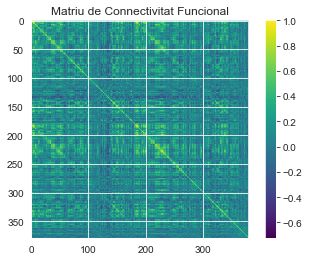

In [97]:
import matplotlib.pyplot as plt

plt.imshow(FC_matrix, cmap='viridis', origin='upper')
plt.title('Matriu de Connectivitat Funcional')
plt.colorbar()
plt.show()

2. GLOBAL BRAIN CONNECTIVITY (GBC)

In [110]:
import os
import numpy as np
import pandas as pd
from Observables import GBC, BOLDFilters

Load Data

In [161]:
base_folder = "/Users/joancarrerasdiaz/Desktop/CARPETES/UdG/TFG/Dades_Gus"
save_folder = "/Users/joancarrerasdiaz/Desktop/CARPETES/UdG/TFG/Data_Produced/ABeta_and_Tau"

In [156]:
# Llistar els subjectes
subjects = [os.path.basename(f.path) for f in os.scandir(os.path.join(base_folder, "connectomes")) if f.is_dir()]

In [159]:
# Obtenir la clasificació dels subjectes
classification = dataLoader.checkClassifications(subjects, fileName="/subjects.csv")

0: Subject 003_S_6014 classified as HC
1: Subject 011_S_4547 classified as AD
2: Subject 036_S_4430 classified as AD
3: Subject 002_S_1261 classified as MCI
4: Subject 007_S_4488 classified as HC
5: Subject 003_S_1122 classified as MCI
6: Subject 036_S_4715 classified as AD
7: Subject 023_S_1190 classified as AD
8: Subject 168_S_6142 classified as AD
9: Subject 012_S_6073 classified as MCI
10: Subject 002_S_0413 classified as HC
11: Subject 002_S_4229 classified as MCI
12: Subject 007_S_4387 classified as HC
13: Subject 023_S_4115 classified as MCI
14: Subject 002_S_1280 classified as HC
15: Subject 002_S_4799 classified as HC
16: Subject 002_S_5230 classified as SMC
17: Subject 114_S_6039 classified as AD
18: Subject 002_S_6103 classified as HC
19: Subject 002_S_4654 classified as MCI
20: Subject 002_S_5178 classified as HC
21: Subject 011_S_4893 classified as AD
22: Subject 114_S_0416 classified as AD
23: Subject 007_S_4272 classified as MCI
24: Subject 007_S_4620 classified as HC
25

In [160]:
# Crear un DataFrame amb subjetes i etiquetes
df = pd.DataFrame({'Subjects': subjects, 'Labels': [classification[s] for s in subjects]})

In [163]:
# Guardar el DataFrame en un arxiu CSV
df.to_csv(os.path.join(save_folder, 'subject_classification.csv'), index=False)

In [188]:
# Inicialitzar matrius per GBC
S = len(subjects)
N =  379 # El nombre de nodes
GBCs = GBC.init(S, N)

In [189]:
# Calcular GBC per cada subjecte
for i, subject in enumerate(subjects):
    # Carregar dades del subjecte
    SCnorm, abeta_burden, tau_burden, fullSeries = dataLoader.loadSubjectData(subject)
    
    # Calcular la GBC desde la senyal fMRI
    GBC_matrix = GBC.from_fMRI(fullSeries, applyFilters=True, removeStrongArtefacts=True)
    
    # Acumular la matriu de connectivitat per el subjete
    GBCs = GBC.accumulate(GBCs, i, GBC_matrix)

In [190]:
# Postprocesar y obtenir GBC promig
average_GBC = GBC.postprocess(GBCs)

In [191]:
# Imprimir el resultat o guardar segons sigui necessari
print("Average GBC:", average_GBC)

Average GBC: [0.18653976 0.18667302 0.18655618 0.186494   0.18654457 0.18658063
 0.18663193 0.18656229 0.18659972 0.18661022 0.18667913 0.18676155
 0.18663806 0.18662915 0.18662188 0.18668168 0.18667318 0.18665986
 0.18666502 0.18675614 0.18679708 0.1867251  0.18671595 0.18673077
 0.18666146 0.18680006 0.1865374  0.18658107 0.18663348 0.18671712
 0.18662516 0.18685318 0.18678423 0.1867875  0.18675837 0.18664938
 0.18660772 0.18656041 0.18666786 0.18667342 0.18669029 0.1867726
 0.18671307 0.18672969 0.18664565 0.18672488 0.1866428  0.18663078
 0.18673166 0.18664504 0.18657683 0.18656944 0.18659921 0.18677878
 0.18677615 0.18667709 0.18670137 0.18682545 0.1867939  0.1867316
 0.18687662 0.18675876 0.18667346 0.18685854 0.18685526 0.18676841
 0.18675822 0.18670115 0.18676487 0.18680738 0.18689561 0.18689995
 0.18661805 0.18675826 0.18676563 0.18680144 0.18679928 0.18661194
 0.18662652 0.18671406 0.18660469 0.18671785 0.18667359 0.18660411
 0.18679132 0.18666831 0.18687162 0.18698644 0.1868

Show Data

In [205]:
import matplotlib as plt
import seaborn as sns

In [206]:
# Visualizar el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(average_GBC, cmap='viridis', square=True, annot=True, fmt=".2f", cbar_kws={'label': 'Average GBC'})
plt.title('Average Global Brain Connectivity (GBC)')
plt.show()

TypeError: 'module' object is not callable

In [192]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [193]:
# Obtenir les etiquetes reals y el GBC promig
true_labels = df['Labels']
correlation_values = average_GBC

In [194]:
# Codificar les etiquetes en valors numèrics
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(true_labels)

In [195]:
# Calcular la matriu de correlació de Pearson
correlation_matrix = np.corrcoef(correlation_values, encoded_labels)

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 379 and the array at index 1 has size 37

In [196]:
print("Longitud de correlation_values:", len(correlation_values))
print("Longitud de encoded_labels:", len(encoded_labels))

Longitud de correlation_values: 379
Longitud de encoded_labels: 37


In [197]:
correlation_values = correlation_values[:len(encoded_labels)]

In [198]:
print("Longitud de correlation_values:", len(correlation_values))
print("Longitud de encoded_labels:", len(encoded_labels))

Longitud de correlation_values: 37
Longitud de encoded_labels: 37


In [202]:
# Calcular la matriu de correlació de Pearson
correlation_matrix = np.corrcoef(correlation_values, encoded_labels)

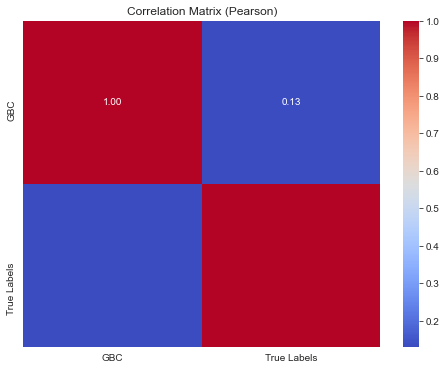

In [203]:
# Mostrar el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=['GBC', 'True Labels'], yticklabels=['GBC', 'True Labels'])
plt.title('Correlation Matrix (Pearson)')
plt.show()